In [183]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [186]:
df = pd.read_csv('Admission.csv')

In [188]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [190]:
df['Chance of Admit '] = [1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [192]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [194]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']

In [196]:
from sklearn.model_selection import train_test_split

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [230]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 7)
y_train (375,)
y_test (125, 7)
y_test (125,)


In [232]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
model_dt = DecisionTreeClassifier(random_state=1)

In [236]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [238]:
y_pred_dt = model_dt.predict(x_test)

In [240]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

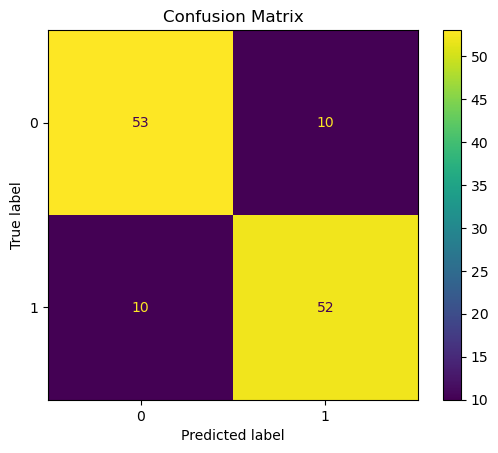

 Accuracy is 0.84
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        63
           1       0.84      0.84      0.84        62

    accuracy                           0.84       125
   macro avg       0.84      0.84      0.84       125
weighted avg       0.84      0.84      0.84       125



In [242]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.title('Confusion Matrix')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))

In [244]:
from sklearn.tree import plot_tree

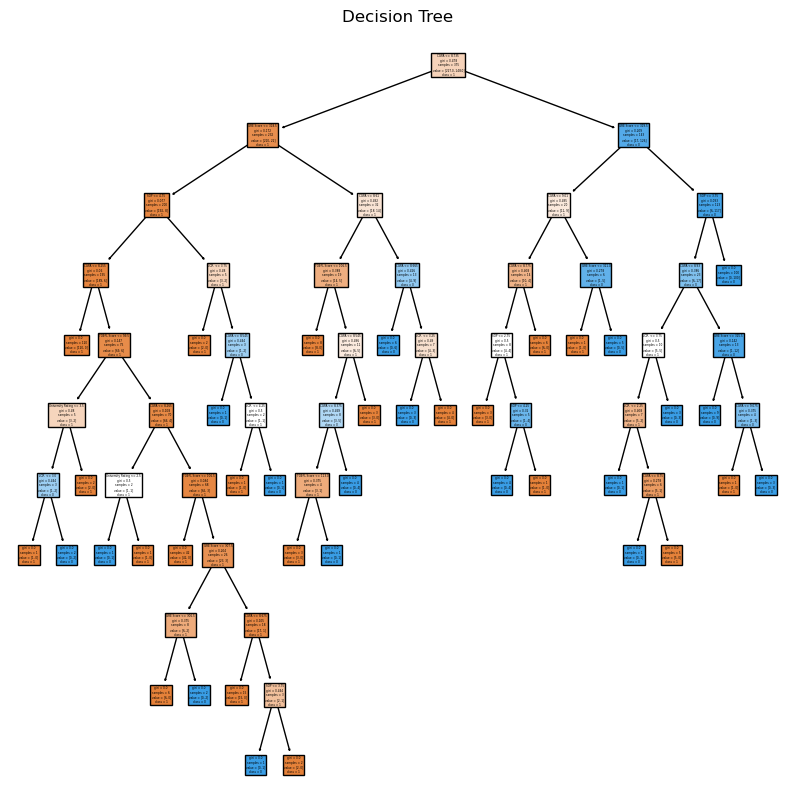

In [254]:
class_names = list(map(str, y.unique()))
plt.figure(figsize=(10, 10))
plot_tree(model_dt, feature_names=x.columns, class_names=class_names, filled=True)
plt.title('Decision Tree')
plt.show()